#  Predicting Coupon Acceptance in an In-Vehicle Recommender System
Name: P K Mohamed Shaheen

##  Introduction to the Project

This project explores customer behavior in response to in-vehicle coupon recommendations. The dataset, obtained from the **UCI Machine Learning Repository**, captures responses from participants about whether they would accept a coupon while in a particular driving context. The data was gathered through a survey conducted via Amazon Mechanical Turk, focusing on users with high ratings (95% or above). After processing, 12,684 usable instances were created from 652 accepted surveys, and the task is to predict the likelihood of a customer accepting a coupon based on various demographic, contextual, and coupon-related attributes.


##  Goal of the Project

The main objective of this project is to build a machine learning model that predicts whether a user will accept or reject a coupon provided through an in-vehicle recommender system.

The prediction task is a binary classification where:

- **Y = 1:** The customer accepts the coupon
- **Y = 0:** The customer rejects the coupon.

The types of coupons evaluated include:
1. Bars
2. Takeaway food
3. Coffee houses
4. Cheap restaurants (average expense < 20 dollar)
5. Expensive restaurants (average expense 20–50 dollar)

The model performance will be assessed based on metrics like accuracy, precision, recall, and F1-score.


##  Data Story

**Source:** The dataset is sourced from the **UCI Machine Learning Repository**.

[Dataset](https://docs.google.com/spreadsheets/d/1r7fsd2w9yAiVt6Vmy4HMMrNsxSg8wXvEeDAN1svvGVU/edit?usp=drive_link)

**Attributes:**  
The dataset includes the following three groups of features:

### 1. User Attributes:
- Gender (Male/Female)
- Age (e.g., 21-25, 26-30, etc.)
- Marital Status (e.g., single, married partner)
- Income levels (e.g., < 12,500, 12,500-24,999, etc.)
- Education (e.g., high school, bachelor’s degree)
- Occupation (e.g., architecture & engineering, healthcare)

### 2. Contextual Attributes:
- Driving destination (e.g., home, work, no urgent destination)
- Weather (e.g., sunny, rainy, snowy)
- Time of day (e.g., 10 AM, 2 PM, 6 PM)
- Passengers (e.g., alone, partner, kids, friends)

### 3. Coupon Attributes:
- Coupon type (bars, coffee houses, etc.)
- Expiration time (e.g., 2 hours, 1 day)

**Target Variable:**  
The target is whether the user accepted the coupon, labeled as **Y**:
- **Y = 1** (Accepted)
- **Y = 0** (Rejected)

The total dataset contains 12,684 rows and 26 columns.


## Importing the Data

In [ ]:
# Import necessary libraries and the dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('in-vehicle-coupon-recommendation.csv')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Describe the Dataset


In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [ ]:
df.shape

(12684, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include="object")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [ ]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [ ]:
# unique values in each column and their counts
for column in df.columns:
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

--------------------------------------------------

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

--------------------------------------------------

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

--------------------------------------------------

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

--------------------------------------------------

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

--------------------------------------------------

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

--------------------------------------------------

expiration
1d    7091
2h    5593
Na

## Data Cleaning


**Handle missing data**

In [ ]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


More than 90% of the values in car column is missing

In [ ]:
# Drop car column
df.drop("car",axis=1,inplace=True)

 For the remaining columns with missing values (Bar, CoffeeHouse, CarryAway,RestaurantLessThan20, Restaurant20To50) imputing with mode might be a good choice as these are categorical variables and the number missing values is relatively small compared to the dataset size.

In [ ]:
# Impute with mode
df['Bar'].fillna(df['Bar'].mode()[0],inplace=True)
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0],inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0],inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0],inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0],inplace=True)

<ipython-input-5-0933311dcf40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bar'].fillna(df['Bar'].mode()[0],inplace=True)
<ipython-input-5-0933311dcf40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Handle Duplicate Rows**

In [ ]:
df.duplicated().sum()

74

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

## Skewness and outlier detection


Since all the numerical features in the dataset are categorical and binary there is no need for skewness check and outlier detection.

## Visualization

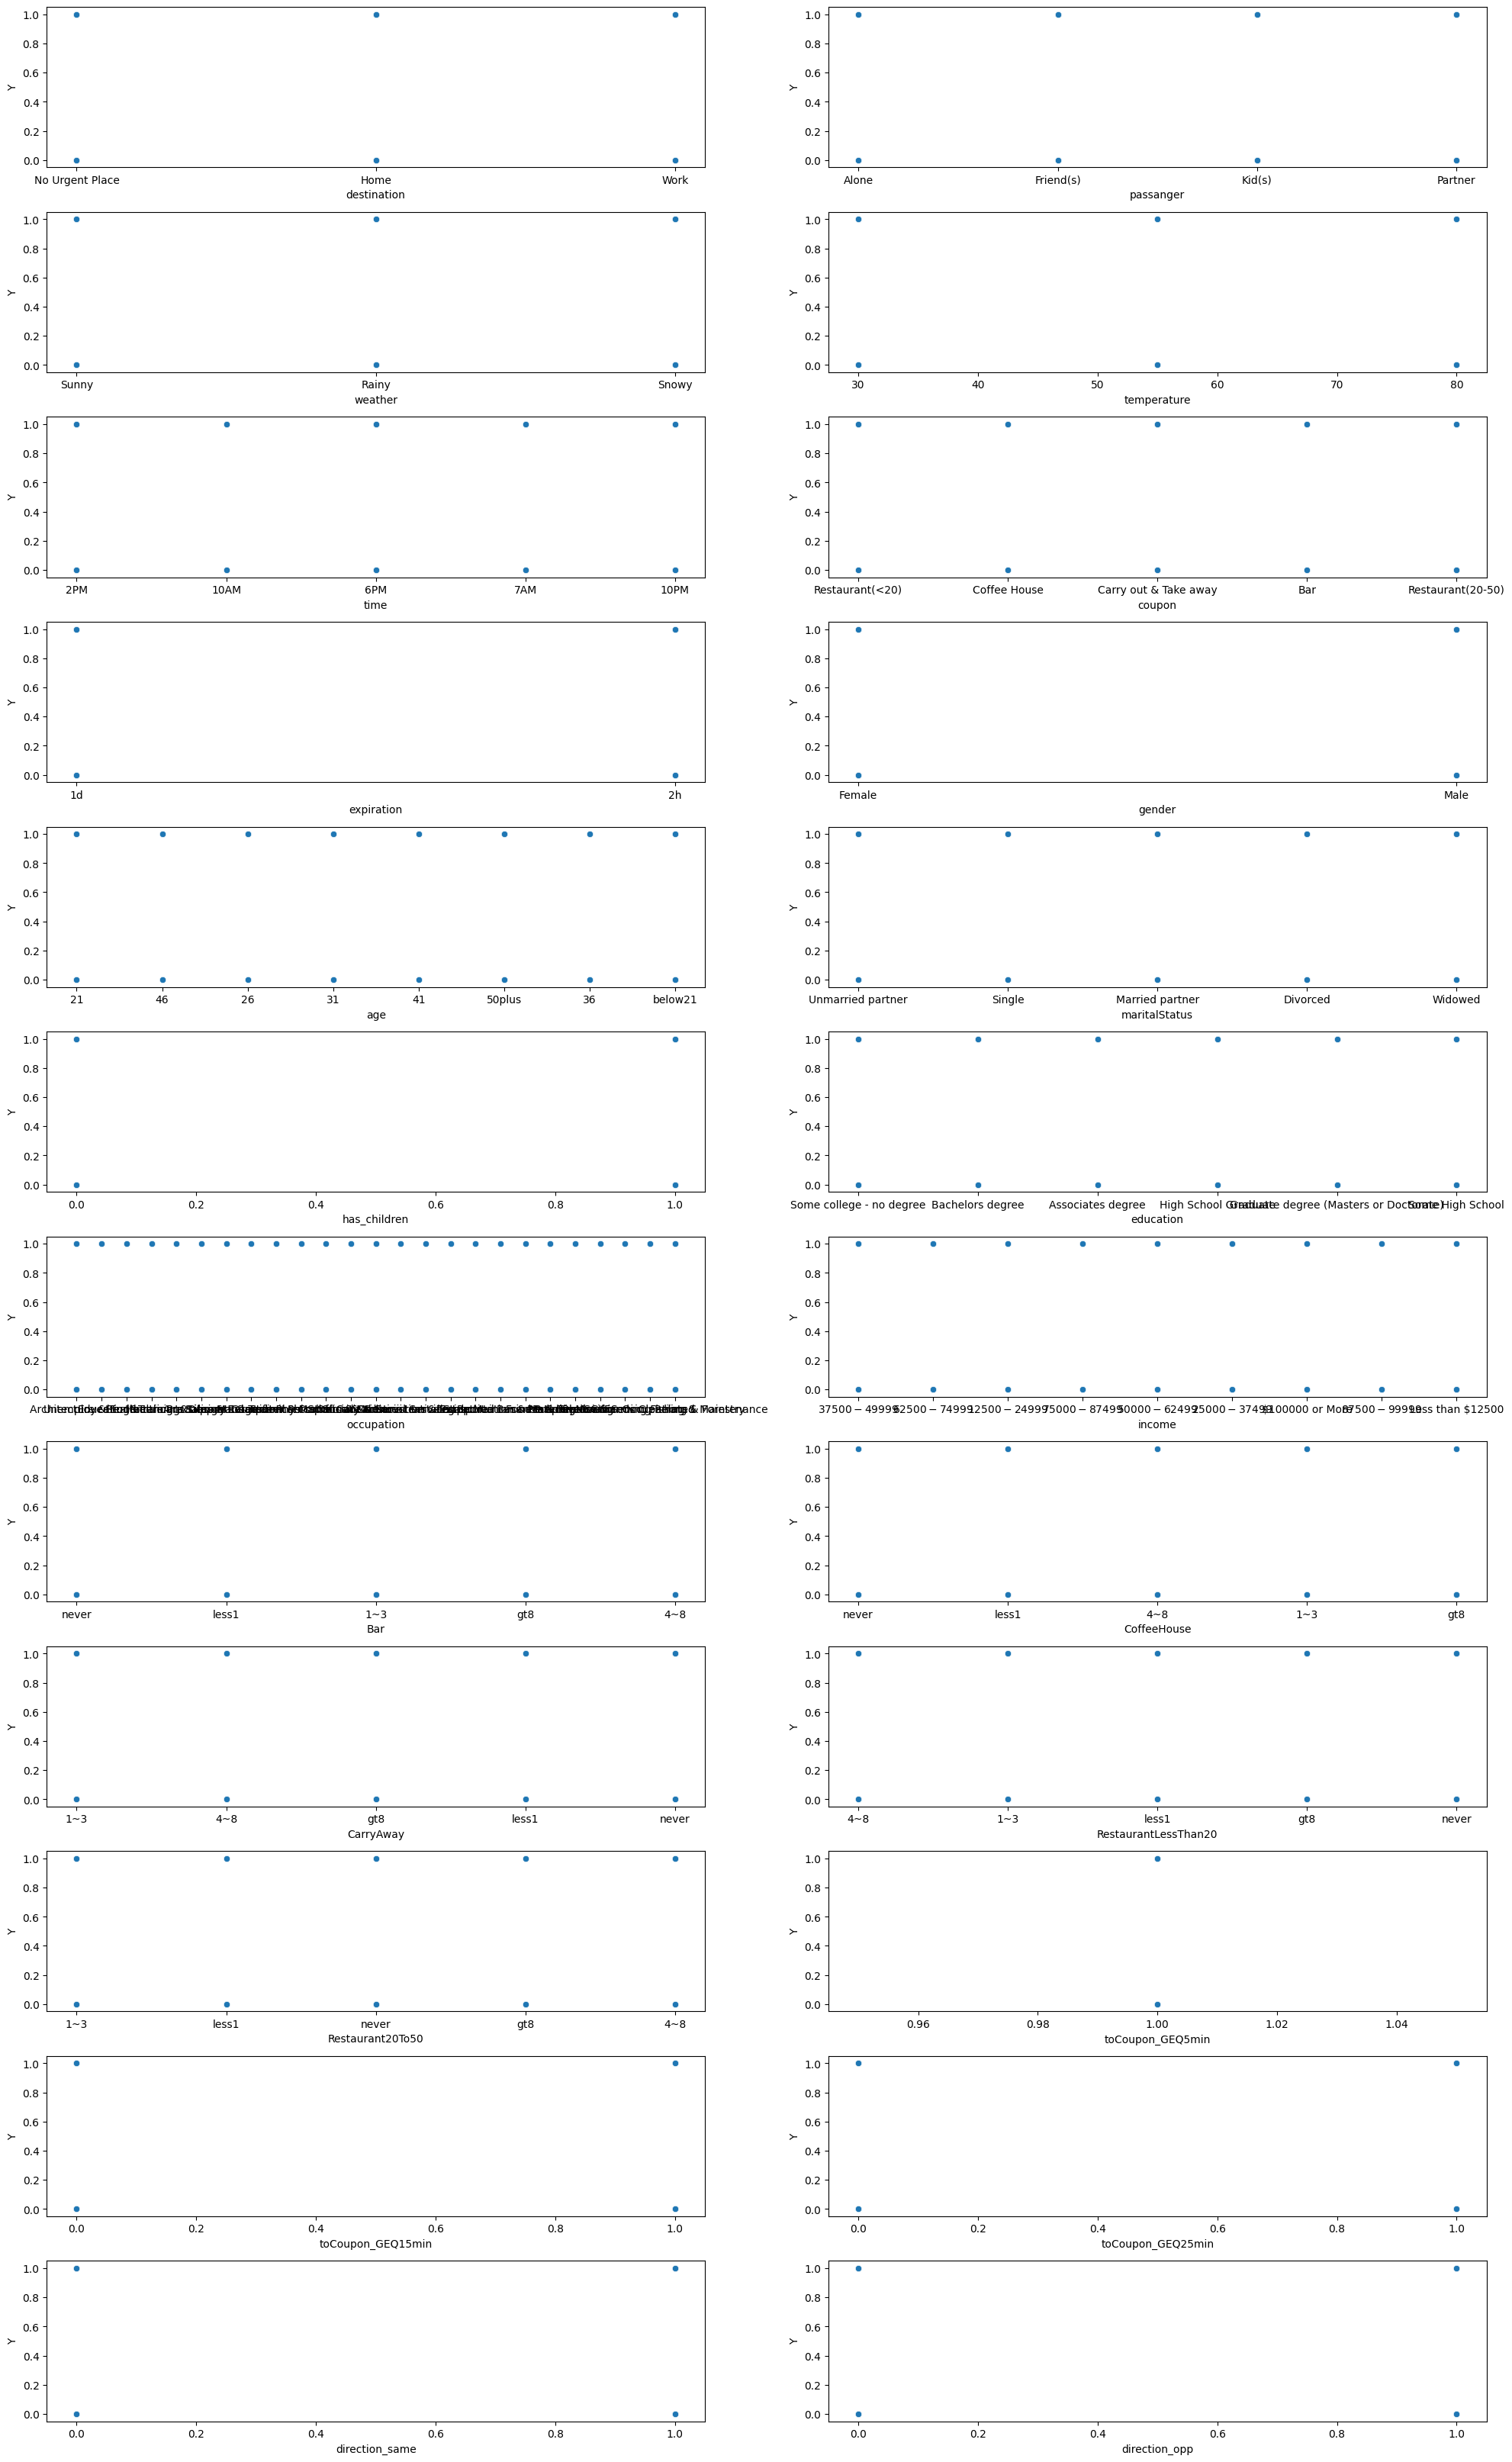

In [ ]:
# scatter plot to identify the relationship between target variable and remaining features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(15, 2, i)
    sns.scatterplot(x=column, y='Y', data=df)
plt.tight_layout()
plt.show()


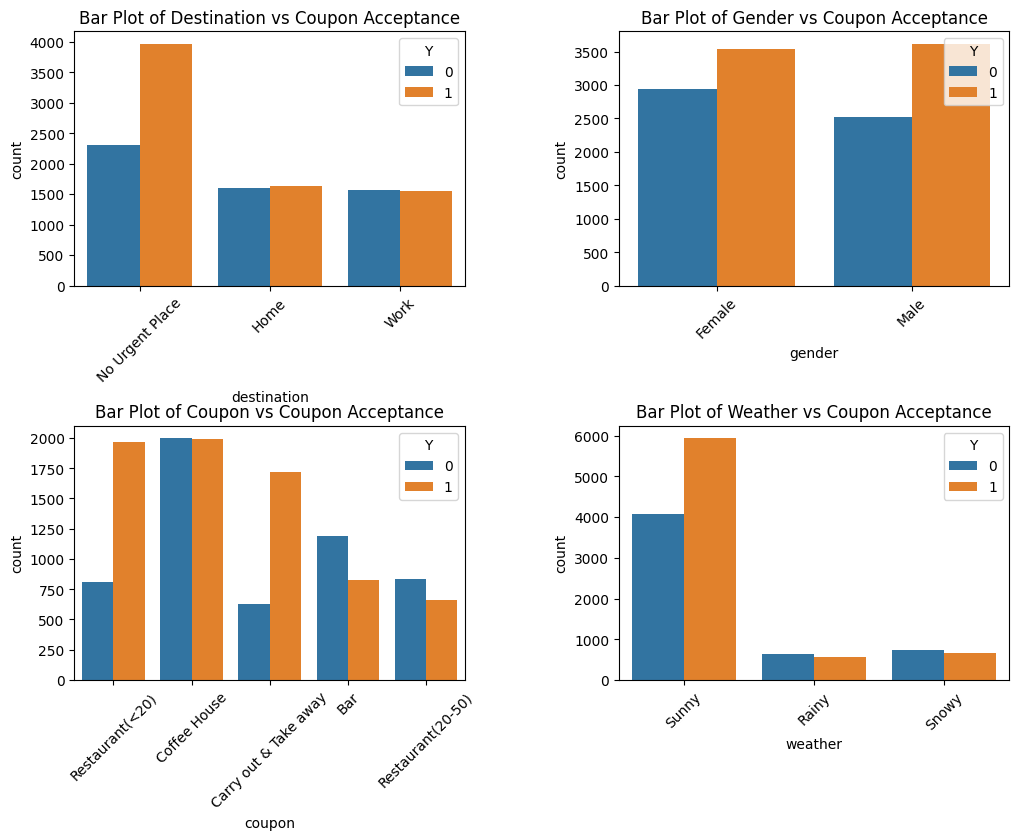

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,9 ))  # Adjust the figure size as needed
fig.tight_layout(pad=8)  # Adjust spacing between plots

# Create bar plots for categorical variables
sns.countplot(x='destination', hue='Y', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Bar Plot of Destination vs Coupon Acceptance')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='gender', hue='Y', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Bar Plot of Gender vs Coupon Acceptance')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='coupon', hue='Y', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Bar Plot of Coupon vs Coupon Acceptance')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='weather', hue='Y', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Bar Plot of Weather vs Coupon Acceptance')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

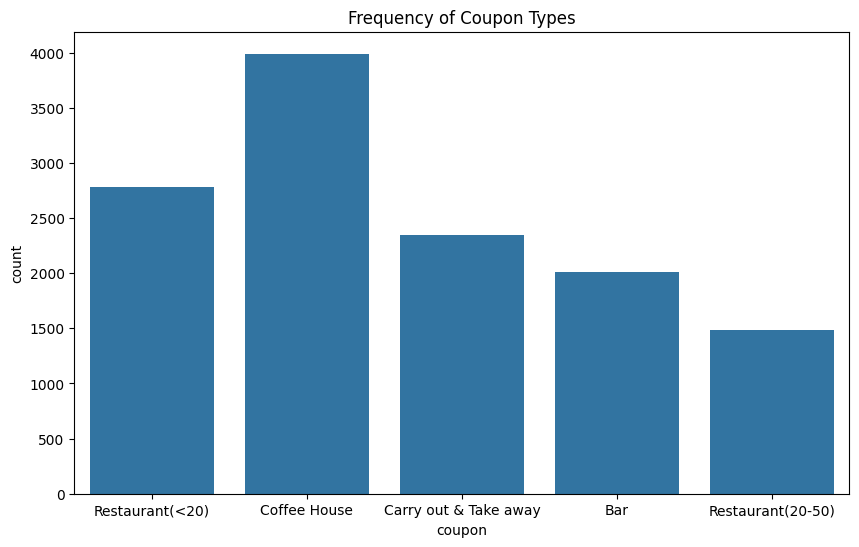

In [ ]:
# Bar plot: Frequency of 'coupon' types
plt.figure(figsize=(10,6))
sns.countplot(x='coupon', data=df)
plt.title('Frequency of Coupon Types')
plt.show()

This chart shows the distribution of different coupon types, which help identify the most common types.

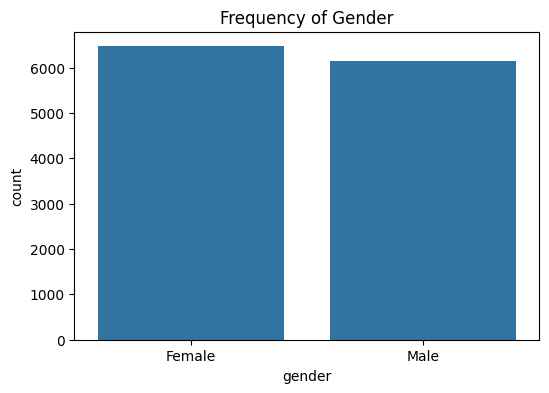

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Frequency of Gender')
plt.show()

This chart shows the distribution of gender.

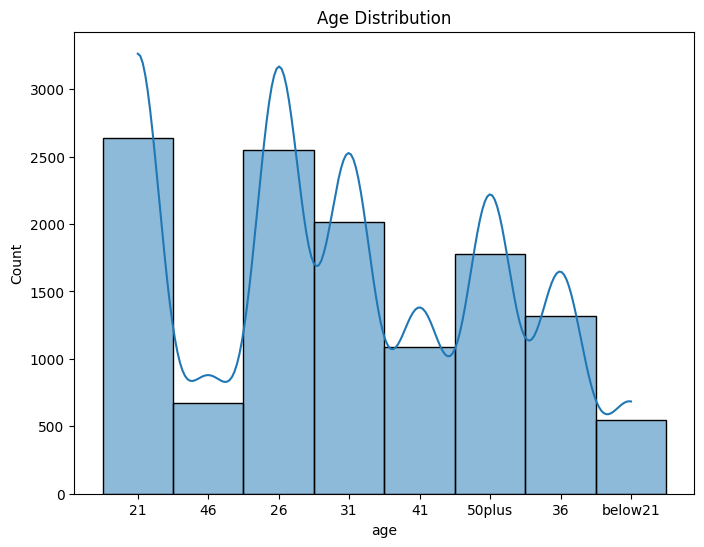

In [ ]:
# Histogram: Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

The age histogram shows the distribution of participants' ages.

## Feature Enginearing

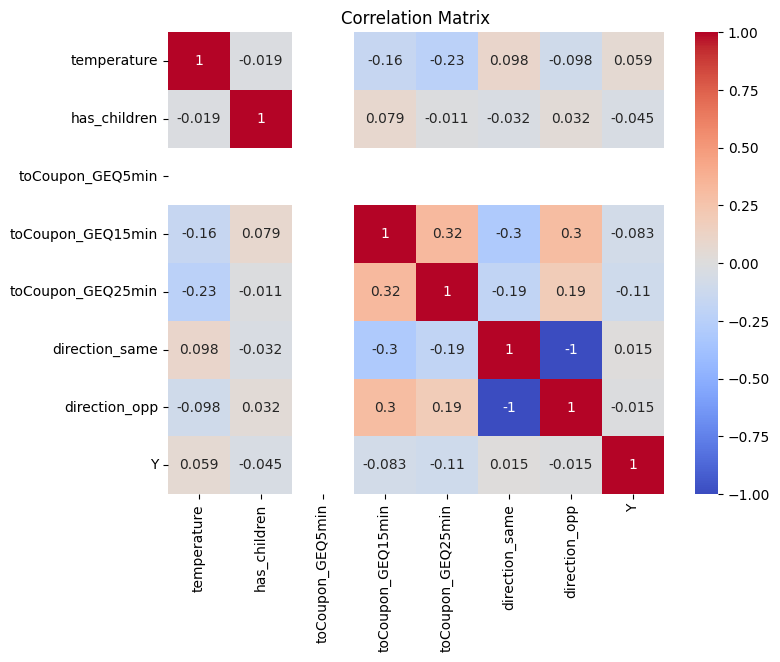

In [ ]:

# Heatmap: Correlation matrix
plt.figure(figsize=(8,6))
corr= df[df.select_dtypes(include='number').columns].corr() # correlation matrix of numerical features
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



**Temperature and Other Features:**

The temperature feature has weak to moderate negative correlations with toCoupon_GEQ15min (-0.157) and toCoupon_GEQ25min (-0.227). This indicates that as temperature changes, there may be a slight inverse effect on these two features, though it’s not very strong.
The temperature feature also has weak correlations with the direction features (direction_same and direction_opp), indicating a low relationship between temperature and these direction attributes.

**Correlations Between Direction Features:**

direction_same and direction_opp are perfectly negatively correlated (-1.000). This is expected, as these two features are binary and complementary. This high correlation could suggest multicollinearity, which might affect model performance if both are included. It's usually best to keep only one of these features.

**Has Children and Coupon Time Features:**

The has_children feature has a low positive correlation with toCoupon_GEQ15min (0.079) and a weak negative correlation with toCoupon_GEQ25min (-0.010). This might indicate a minimal relationship between having children and the likelihood of using a coupon within a certain time, though it’s not significant enough to draw strong conclusions.

**Coupon Time Features:**

toCoupon_GEQ15min and toCoupon_GEQ25min show a moderate positive correlation (0.321), suggesting that these features are somewhat related. If a user is likely to use a coupon within 15 minutes, they might also be more inclined to consider using it within 25 minutes.

**Relationship with the Target (Y):**

The target variable Y has low correlations with all other features, indicating that none of these features have a strong direct linear relationship with the target. The highest correlation is with toCoupon_GEQ25min (-0.108), which is still relatively weak.

**NaN Values in Correlation Matrix:**

The toCoupon_GEQ5min feature appears to have no valid correlation values with other features. This could indicate that this feature has constant or missing values in the dataset, so it may not contribute valuable information to the model.

In [ ]:
# drop column toCoupon_GEQ5min,direction_same' based on the insights from Heat map
df1=df.drop(['toCoupon_GEQ5min','direction_same'],axis=1)

In [ ]:
# object and numerical columns
print(df1.select_dtypes(include='object').columns)
print(df1.select_dtypes(include='number').columns)

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


## Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_cols=['temperature','destination', 'passanger', 'weather', 'time', 'coupon', 'expiration','gender', 'age', 'maritalStatus', 'education', 'occupation', 'income','Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
binary_cols=['has_children', 'toCoupon_GEQ15min','toCoupon_GEQ25min', 'direction_opp']

# One-Hot Encoding for  categorical columns
df1_encoded = pd.get_dummies(df1, columns=categorical_cols)


# Now X_train and X_test are ready for machine learning models




since all the numerical data in this dataset is either categorical or binary there is no need for scaling.

# Split Dataset

In [ ]:
# split dataset

from sklearn.model_selection import train_test_split
X=df1_encoded.drop("Y",axis=1)
y=df1_encoded['Y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## Try different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()

}

# Dictionary to store training and testing accuracies
model_accuracies = {}

# Loop through each model, train it, and calculate accuracy
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    cls_rprt=classification_report(y_test, y_test_pred,output_dict=True)
    # Store the results
    model_accuracies[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision':cls_rprt['weighted avg']['precision'],
        'Recall':cls_rprt['weighted avg']['recall'],
        'F1-score':cls_rprt['weighted avg']['f1-score']
        }

    # Print the classification report for each model
    print(f"Model: {model_name}")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("="*50)



Model: Logistic Regression
Training Accuracy: 0.6929024583663759
Testing Accuracy: 0.6788263283108644
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.61      1106
           1       0.69      0.77      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522

Model: Decision Tree
Training Accuracy: 0.9991078509119746
Testing Accuracy: 0.6712926249008723
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.63      1106
           1       0.71      0.70      0.71      1416

    accuracy                           0.67      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.67      0.67      0.67      2522

Model: Random Forest
Training Accuracy: 0.9991078509119746
Testing Accuracy: 0.7422680412371134
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Training Accuracy: 0.6907216494845361
Testing Accuracy: 0.6792228390166535
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.60      1106
           1       0.69      0.77      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522

Model: SVM
Training Accuracy: 0.8267248215701823
Testing Accuracy: 0.7414750198255353
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.68      1106
           1       0.74      0.82      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.73      2522
weighted avg       0.74      0.74      0.74      2522

Model: Naive Bayes
Training Accuracy: 0.6390761300555114
Testing Accuracy: 0.6328310864393338
Classification Report:
    

In [ ]:
# Display the accuracies
pd.DataFrame(model_accuracies).T*100

,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
Logistic Regression,69.290246,67.882633,67.653456,67.882633,67.509173
Decision Tree,99.910785,67.129262,67.152540,67.129262,67.140384
Random Forest,99.910785,74.226804,74.145570,74.226804,74.002083
Gradient Boosting,74.068200,71.173672,71.128601,71.173672,70.708732
AdaBoost,69.072165,67.922284,67.698819,67.922284,67.512480
SVM,82.672482,74.147502,74.117784,74.147502,73.846890
Naive Bayes,63.907613,63.283109,63.811188,63.283109,63.413790
K-Nearest Neighbors,78.747026,65.939730,65.657912,65.939730,65.601161


- **Decision Tree** and **Random Forest** show clear signs of overfitting, with very high training accuracy (close to 100%) and a noticeable drop in test accuracy.

- **K-Nearest Neighbors** **(KNN)**  also shows overfitting, as its training accuracy is significantly higher than its test accuracy.

- **SVM** has some overfitting, as indicated by a slightly high training accuracy compared to test accuracy, though this overfitting is less pronounced.

- **Naive Bayes** shows signs of underfitting, as both training and test accuracy are low, indicating that it may not be learning patterns well.

- **Logistic Regression** and **AdaBoost** have similar training and test accuracy, but both are comparatively low.

- **Gradient Boosting** shows minimal overfitting, as the training and test accuracy are relatively close, with reasonable overall performance. This model may be the most balanced of all, though there is still room to improve test accuracy.

## Regularization to Address Overfitting

In [ ]:
# 1. Regularizing Decision Tree


# Decision Tree with regularization
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

print("Decision Tree")
print("Test Accuracy (after regularization):", accuracy_score(y_test_pred, y_test))
print("Train Accuracy (after regularization):", accuracy_score(y_train_pred, y_train))


Decision Tree
Test Accuracy (after regularization): 0.6570182394924663
Train Accuracy (after regularization): 0.6818001586042823


In [ ]:
# Regularizing Random Forest

# Random Forest with regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("random forest")
print("Test Accuracy (after regularization):", accuracy_score(y_test_pred, y_test))
print("Train Accuracy (after regularization):", accuracy_score(y_train_pred, y_train))


random forest
Test Accuracy (after regularization): 0.7085646312450437
Train Accuracy (after regularization): 0.776665344964314


In [ ]:
# Regularizing K-Nearest Neighbors (KNN)

# KNN with increased n_neighbors to reduce overfitting
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print("knn")
print("Test Accuracy (after regularization):", accuracy_score(y_test_pred, y_test))
print("Train Accuracy (after regularization):", accuracy_score(y_train_pred, y_train))



knn
Test Accuracy (after regularization): 0.6728786677240286
Train Accuracy (after regularization): 0.7527755749405234


In [ ]:


# SVM with L2 regularization by adjusting the C parameter
svm = SVC(kernel='linear', C=1.0, random_state=42)  # Lower C to apply stronger regularization
svm.fit(X_train, y_train)
y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

print("svm")
print("Test Accuracy (after regularization):", accuracy_score(y_test_pred, y_test))
print("Train Accuracy (after regularization):", accuracy_score(y_train_pred, y_train))

svm
Test Accuracy (after regularization): 0.682791435368755
Train Accuracy (after regularization): 0.6967684377478192


 **Overfitting Reduction**: Regularization successfully reduced overfitting in all models, particularly Decision Tree, Random Forest, and SVM. KNN showed improved generalization.

 **Generalization Impact**:

- Improved for KNN: Test accuracy increased, making KNN more robust.
- Slightly Worse for Decision Tree and Random Forest: Reduced overfitting but at a slight cost to generalization.
- Worse for SVM: Significant drop in both train and test accuracy, indicating potential underfitting due to high regularization.

## Hyperparameter Tuning Using GridSearchCV

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
         'C': [0.1, 1, 10, 100],                  # Regularization strength
         'solver': ['lbfgs', 'saga'],             # Solver
         'penalty': ['l2'],                       # Regularization penalty
         'max_iter': [100, 200, 500,1000]         # Number of iterations
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naive Bayes': {
        # Naive Bayes typically doesn't have many hyperparameters to tune;
        # if you are using GaussianNB, you can include options for priors.
        # Here we are simply running it as is, as it doesn't typically benefit from GridSearch.
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
    }
}

# Dictionary to hold the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store best results for each model
best_results = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")

    if model_name in param_grids:
        # Initialize GridSearchCV with the specified parameter grid
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        y_pred=grid_search.predict(X_test)

        # Store best parameters and best score
        best_results[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Best Training Accuracy': grid_search.score(X_train,y_train),
            'Test Accuracy': grid_search.score(X_test, y_test)
        }

        # Display the best results
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
        print(f"Training Accuracy with Best Parameters: {grid_search.score(X_train, y_train):.4f}")
        print(f"Test Accuracy with Best Parameters: {grid_search.score(X_test, y_test):.4f}")
        print(f'Classification report:\n {classification_report(y_test,y_pred)}')
    else:
        # For models with no hyperparameters in the grid (e.g., Naive Bayes)
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)

        # Store results for Naive Bayes
        best_results[model_name] = {
            'Best Parameters': 'N/A',
            'Best Training Accuracy': model.score(X_train, y_train),
            'Test Accuracy': test_accuracy
        }

        # Display results for Naive Bayes
        print("No hyperparameters to tune for Naive Bayes.")
        print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f'Classification report:\n {classification_report(y_test,y_pred)}')





Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.6850
Training Accuracy with Best Parameters: 0.6941
Test Accuracy with Best Parameters: 0.6800
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.61      1106
           1       0.69      0.77      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.68      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522


Tuning hyperparameters for Decision Tree...
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.6974
Training Accuracy with Best Parameters: 0.7967
Test Accuracy with Best Parameters: 0.6887
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.59      0.62      1106


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.6860
Training Accuracy with Best Parameters: 0.6907
Test Accuracy with Best Parameters: 0.6792
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.60      1106
           1       0.69      0.77      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522


Tuning hyperparameters for SVM...
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7593
Training Accuracy with Best Parameters: 0.9663
Test Accuracy with Best Parameters: 0.7518
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1106
           1       0.77      0.80      0.78      1416

    accuracy                           0.75   

In [ ]:
res=pd.DataFrame(best_results).T
res

,Best Parameters,Best Training Accuracy,Test Accuracy
Logistic Regression,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.694092,0.680016
Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.796689,0.688739
Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.999108,0.741475
Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.987411,0.752181
AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 50}",0.690722,0.679223
SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.966297,0.751784
Naive Bayes,{},0.639076,0.632831
K-Nearest Neighbors,"{'n_neighbors': 11, 'p': 1, 'weights': 'distan...",0.999108,0.691515


Top Performers:

- Gradient Boosting and SVM have the highest test accuracies (75.22% and 75.18%, respectively), indicating they are the best-performing models.
- Random Forest also performs well with a 74.15% test accuracy but shows the highest overfitting, as indicated by near-perfect training accuracy.

Moderate Performers:

- Logistic Regression has minimal overfitting and moderate test accuracy (68.00%). It could serve as a stable baseline but may lack the complexity needed to capture intricate patterns in the data.
- Decision Tree has a high training accuracy of 79.67% but drops to 68.87% on the test set, indicating it overfits due to its flexibility without additional regularization.

Underperformers:

- Naive Bayes achieves a test accuracy of 63.28%. Given its lower complexity, it’s likely not capturing enough of the data’s structure.
- AdaBoost performs similarly to Logistic Regression, achieving 67.92% test accuracy but also without overfitting. However, it does not offer substantial improvements over other models.

Overfitting Observed:

- Decision Tree, Random Forest, Gradient Boosting, and SVM show signs of overfitting, with training accuracies significantly higher than their test accuracies.

## Regularizing Top Performers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train,y_train)
tra_acc=rf.score(X_train,y_train)
test_acc=rf.score(X_test,y_test)
print(tra_acc,test_acc)


0.9991078509119746 0.7371134020618557


In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=5, min_samples_split=10, random_state=42)
rf.fit(X_train,y_train)
tra_acc=rf.score(X_train,y_train)
test_acc=rf.score(X_test,y_test)
print(tra_acc,test_acc)

0.7784496431403648 0.7077716098334655


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150)
gb.fit(X_train,y_train)
gb_tra_acc=gb.score(X_train,y_train)
gb_test_acc=gb.score(X_test,y_test)
print(gb_tra_acc,gb_test_acc)

0.9863203806502776 0.7521808088818398


In [ ]:
from sklearn.svm import SVC
svm = SVC(C=0.2, gamma='scale', kernel='linear', probability=True)
svm.fit(X_train,y_train)
svm_tra_acc=svm.score(X_train,y_train)
svm_test_acc=svm.score(X_test,y_test)
print(svm_tra_acc,svm_test_acc)

0.6968675654242664 0.6819984139571769


Attempts to improve top performers didn't give any improvment

## Ensemble the Top Models for Stability:

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble of top models with soft voting
ensemble = VotingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150, random_state=42)),
        ('Random Forest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)),
        ('SVM', SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42))
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)
train_acc = ensemble.score(X_train, y_train)
test_acc = ensemble.score(X_test, y_test)
print("Ensemble - Train Accuracy:", train_acc)
print("Ensemble - Test Accuracy:", test_acc)


Ensemble - Train Accuracy: 0.9923671689135607
Ensemble - Test Accuracy: 0.7557494052339413


The Ensemble Model has achieved a Train Accuracy of 99.24% and a Test Accuracy of 75.57%, which is a positive result overall.

## Early Stopping on Ensemble Model

In [ ]:
from sklearn.model_selection import train_test_split


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model =  VotingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150, random_state=42)),
        ('Random Forest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)),
        ('SVM', SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42))
    ],
    voting='soft'
)
# Initialize variables to track best performance
best_val_score = 0
best_model = None

# Train the model iteratively
for i in range(100):  # Adjust the number of iterations as needed
    model.fit(X_train, y_train)
    val_score = model.score(X_val, y_val)

    if val_score > best_val_score:
        best_val_score = val_score
        best_model = model
    else:
        # Early stopping if validation score decreases
        break


best_val_score

0.7557494052339413

In [ ]:
best_model.fit(X_train,y_train)
tra_acc=best_model.score(X_train,y_train)
test_acc=best_model.score(X_test,y_test)
print(tra_acc,test_acc)

0.9923671689135607 0.7557494052339413


The ensemble model with early stopping didn't provide the expected performance boost.

## Feature Selection (SelectKBest on Ensemble)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the ensemble model as before
ensemble = VotingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150, random_state=42)),
        ('Random Forest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)),
        ('SVM', SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42))
    ],
    voting='soft'
)

# Select K best features
selector = SelectKBest(score_func=f_classif, k=60)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# Train the ensemble model on the selected features
ensemble.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = ensemble.predict(X_test_selected)


# Evaluate the ensemble model on the training set
train_accuracy = ensemble.score(X_train_selected, y_train)

# Evaluate the ensemble model on the test set
test_accuracy = ensemble.score(X_test_selected, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9794805709754163
Test Accuracy: 0.7414750198255353


Executing the model with feature selection also didn't outperform the basic ensemble model.

## Best Model

After extensive experimentation with various model architectures and hyperparameter tuning, the ensemble model comprising Gradient Boosting, Random Forest, and SVM classifiers emerged as the top-performing model, achieving a test accuracy of 75.57%

## Save the Best Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import joblib

# Define columns based on types
binary_features = ['has_children', 'toCoupon_GEQ15min','toCoupon_GEQ25min', 'direction_opp']
categorical_features = ['temperature','destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
                        'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income','Bar', 'CoffeeHouse', 'CarryAway',
                        'RestaurantLessThan20','Restaurant20To50']

# Preprocessing for different types of features
preprocessor = ColumnTransformer(
    transformers=[

        # Binary columns - Impute with mode (most frequent)
        ('binary', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent'))
        ]), binary_features),

        # Categorical columns - Impute with mode, then one-hot encode
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),

    ],
    remainder='drop'  # drop other columns
)

# Define the best ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150, random_state=42)),
        ('Random Forest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)),
        ('SVM', SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42))
    ],
    voting='soft'
)

# Create a full pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ensemble', ensemble)
])

# define X and y
X=df.drop("Y",axis=1)
y=df["Y"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy on the test set
print("Accuracy on the test set:", accuracy)


# Save the complete pipeline for future use
joblib.dump(pipeline, 'couponaccept_pipeline_model.joblib')
print("Complete pipeline with preprocessing and model saved successfully as 'couponaccept_pipeline_model.joblib'")


Accuracy on the test set: 0.7593180015860428
Complete pipeline with preprocessing and model saved successfully as 'couponaccept_pipeline_model.joblib'


Generate some unseen

In [ ]:
import pandas as pd
import numpy as np

# Define the number of samples
num_samples = 100

# Generate synthetic data
new_data = {
    'destination': np.random.choice(['No Urgent Place', 'Home', 'Work'], num_samples),
    'passanger': np.random.choice(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], num_samples),
    'weather': np.random.choice(['Sunny', 'Rainy', 'Snowy'], num_samples),
    'temperature': np.random.choice([30, 55, 80], num_samples),
    'time': np.random.choice(['2PM', '10AM', '6PM', '7AM', '10PM'], num_samples),
    'coupon': np.random.choice(['Restaurant(<$20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant($20-$50)'], num_samples),
    'expiration': np.random.choice(['1d', '2h'], num_samples),
    'gender': np.random.choice(['Female', 'Male'], num_samples),
    'age': np.random.choice(['below21', '21', '26', '31', '36', '41', '46', '50plus'], num_samples),
    'maritalStatus': np.random.choice(['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed'], num_samples),
    'has_children': np.random.choice([0, 1], num_samples),
    'education': np.random.choice(['Some college - no degree', 'Bachelors degree', 'Associates degree', 'High School Graduate', 'Graduate degree', 'Some High School'], num_samples),
    'occupation': np.random.choice(['Unemployed', 'Architecture & Engineering', 'Student', 'Education & Training & Library', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media'], num_samples),
    'income': np.random.choice(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499', '$100000 or More', '$87500 - $99999', 'Less than $12500'], num_samples),
    'Bar': np.random.choice(['never', 'less1', '1~3', 'gt8', '4~8'], num_samples),
    'CoffeeHouse': np.random.choice(['never', 'less1', '4~8', '1~3', 'gt8'], num_samples),
    'CarryAway': np.random.choice(['never', 'less1', '4~8', '1~3', 'gt8'], num_samples),
    'RestaurantLessThan20': np.random.choice(['never', 'less1', '4~8', '1~3', 'gt8'], num_samples),
    'Restaurant20To50': np.random.choice(['never', 'less1', '4~8', '1~3', 'gt8'], num_samples),
    'toCoupon_GEQ5min': np.random.choice([0, 1], num_samples),
    'toCoupon_GEQ15min': np.random.choice([0, 1], num_samples),
    'toCoupon_GEQ25min': np.random.choice([0, 1], num_samples),
    'direction_same': np.random.choice([0, 1], num_samples),
    'direction_opp': np.random.choice([0, 1], num_samples)
}
# Convert to DataFrame
unseen_df = pd.DataFrame(new_data)
print(unseen_df.head(3))


       destination  passanger weather  temperature time               coupon  \
0             Home      Alone   Rainy           55  6PM         Coffee House   
1             Work  Friend(s)   Sunny           55  7AM     Restaurant(<$20)   
2  No Urgent Place     Kid(s)   Snowy           80  2PM  Restaurant($20-$50)   

  expiration  gender      age    maritalStatus  ...    Bar CoffeeHouse  \
0         2h    Male   50plus  Married partner  ...  less1       never   
1         1d  Female  below21          Widowed  ...    1~3         1~3   
2         1d  Female       31  Married partner  ...    4~8         gt8   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       1~3                  4~8            less1                0   
1       4~8                  gt8            never                1   
2       gt8                  1~3            less1                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  
0                 0            

## Using the Loaded Pipeline on Unseen Data

In [ ]:
# Load the saved pipeline
loaded_pipeline = joblib.load('couponaccept_pipeline_model.joblib')

# Apply the loaded pipeline to make predictions on new, unseen data
predictions = loaded_pipeline.predict(unseen_df)
print(predictions)




[0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1]


The saved model has successfully made predictions on unseen data without encountering any errors or runtime issues.

## Conclusion
Based on the results, the ensemble Voting Classifier, combining Gradient Boosting, Random Forest, and SVM, achieves the best overall performance, with a train accuracy of 0.992 and a higher test accuracy of 0.756 compared to the individual models. This indicates that while models like Random Forest and Gradient Boosting perform well independently, the Voting Classifier ensemble leverages each model’s strengths, making it the most effective approach for this dataset.